Тема “Обучение без учителя”

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, 
чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [75]:
# Магическая команда для отображения графиков прямо в Jupyter Notebook, а не в отдельном окне
%matplotlib inline
# Магическая функция для более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'
# Используем для графиков стиль “fivethirtyeight” 
plt.style.use('fivethirtyeight')

In [76]:
# Загружаем "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn
from sklearn.datasets import load_boston
# Решаем проблему с этическим выводом ошибки касательно "Boston House Prices dataset"
warnings.filterwarnings('ignore')
boston = load_boston()

In [77]:
# Данные о недвижимости объектов хранятся в массиве по ключу 'data'
data = boston["data"]
# data.shape

In [78]:
# Характеристики объектов недвижимости хранятся в массиве по ключу 'feature_names'
feature_names = boston["feature_names"]
# feature_names

In [79]:
# Цены на недвижимость хранятся в массиве по ключу 'target'
target = boston["target"]
# target[:10]

In [80]:
# Создадим `DataFrame`. В `df_x` будут храниться ПрИзНаКи. В качестве названий для столбцов возьмём массив `feature_names`:
df_x = pd.DataFrame(data, columns=feature_names)
df_x.head()
#df_x.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
# Создадим `DataFrame`. В `df_y` будут храниться ЦеЛеВыЕ значения цены:
df_y = pd.DataFrame(target, columns=["price"])
df_y.head()
#df_y.info()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [82]:
# Разобьем эти датафреймы на тренировочные (x_train, y_train) и тестовые (x_test, y_test) с помощью функции train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [83]:
# Масштабируем данные с помощью StandardScaler
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train_scaled.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [84]:
# Построим модель TSNE на тренировочный данных (метод уменьшения размерности)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

# Посмотрим как изменилось кол-во признаков
print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))


До:	(404, 13)
После:	(404, 2)


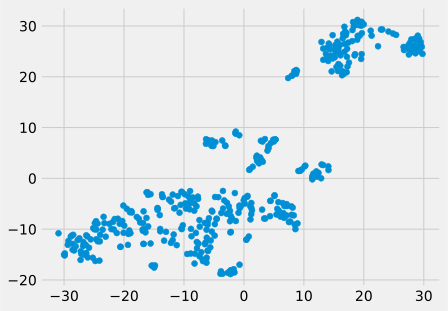

In [85]:
# Построим диаграмму рассеяния
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [86]:
from sklearn.cluster import KMeans

In [87]:
# С помощью KMeans (кластеризация средних) разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма x_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42

model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(x_train_scaled)

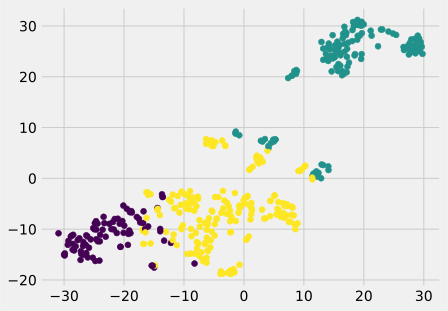

In [88]:
# Построим диаграмму рассеяния на данных, полученных с помощью TSNE, раскрасив точки из разных кластеров разными цветами

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
plt.show()

*Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [89]:
# Применим модель KMeans, построенную в предыдущем задании, к данным из тестового набора
labels_test = model.fit_predict(x_test_scaled)

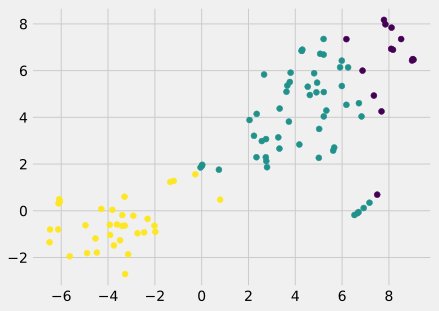

In [90]:
# Построим диаграмму рассеяния на данных, полученных с помощью TSNE, раскрасив точки из разных кластеров разными цветами
x_test_tsne = tsne.fit_transform(x_test_scaled)

plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=labels_test)
plt.show()

In [91]:
# Вычислим средние значения price в разных кластерах на тестовых данных
print('Кластер 0:', y_test['price'][labels_test == 0].mean())
print('Кластер 1:', y_test['price'][labels_test == 1].mean())
print('Кластер 2:', y_test['price'][labels_test == 2].mean())

Кластер 0: 33.871428571428574
Кластер 1: 21.552830188679245
Кластер 2: 16.43714285714286


In [92]:
# Вычислим средние значения CRIM в разных кластерах на тестовых данных
print('Кластер 0:', x_test['CRIM'][labels_test == 0].mean())
print('Кластер 1:', x_test['CRIM'][labels_test == 1].mean())
print('Кластер 2:', x_test['CRIM'][labels_test == 2].mean())

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
